Is there a relationship between the daily minimum and maximum temperature? Can you predict the maximum temperature given the minimum temperature?

Source: https://www.kaggle.com/smid80/weatherww2/data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
train_weather_locations=pd.read_csv('Weather Station Locations.csv')

In [37]:
train_summary_weather=pd.read_csv('Summary of Weather.csv')

/home/daniel/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
train_weather_locations.head()

WBAN            NAME STATE/COUNTRY ID    LAT     LON  ELEV   Latitude  \
0  33013          AIN EL               AL  3623N  00637E   611  36.383333   
1  33031        LA SENIA               AL  3537N  00037E    88  35.616667   
2  33023  MAISON BLANCHE               AL  3643N  00314E    23  36.716667   
3  33044        TELERGMA               AL  3607N  00621E   754  36.116667   
4  12001         TINDOUF               AL  2741N  00809W   443  27.683333   

   Longitude  
0   6.650000  
1   0.583333  
2   3.216667  
3   6.416667  
4  -8.083333

In [7]:
train_summary_weather.head()

STA      Date Precip  WindGustSpd    MaxTemp    MinTemp   MeanTemp  \
0  10001  1942-7-1  1.016          NaN  25.555556  22.222222  23.888889   
1  10001  1942-7-2      0          NaN  28.888889  21.666667  25.555556   
2  10001  1942-7-3   2.54          NaN  26.111111  22.222222  24.444444   
3  10001  1942-7-4   2.54          NaN  26.666667  22.222222  24.444444   
4  10001  1942-7-5      0          NaN  26.666667  21.666667  24.444444   

  Snowfall PoorWeather  YR ...   FB  FTI ITH  PGT  TSHDSBRSGF  SD3  RHX  RHN  \
0        0         NaN  42 ...  NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
1        0         NaN  42 ...  NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
2        0         NaN  42 ...  NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
3        0         NaN  42 ...  NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
4        0         NaN  42 ...  NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   

  RVG  WTE  
0 NaN  NaN  
1 NaN  NaN  
2 NaN  NaN  
3 NaN  NaN  
4 NaN  NaN  

[5 rows x 31 columns]

In [355]:
#train_weather_locations[train_weather_locations['WBAN']==10001]
train_summary_weather.isnull().head()

STA   Date  Precip  WindGustSpd  MaxTemp  MinTemp  MeanTemp  Snowfall  \
0  False  False   False         True    False    False     False     False   
1  False  False   False         True    False    False     False     False   
2  False  False   False         True    False    False     False     False   
3  False  False   False         True    False    False     False     False   
4  False  False   False         True    False    False     False     False   

   PoorWeather     YR  ...     FB   FTI   ITH   PGT  TSHDSBRSGF   SD3   RHX  \
0         True  False  ...   True  True  True  True        True  True  True   
1         True  False  ...   True  True  True  True        True  True  True   
2         True  False  ...   True  True  True  True        True  True  True   
3         True  False  ...   True  True  True  True        True  True  True   
4         True  False  ...   True  True  True  True        True  True  True   

    RHN   RVG   WTE  
0  True  True  True  
1  True  True  True  
2  True  True  True  
3  True  True  True  
4  True  True  True  

[5 rows x 31 columns]

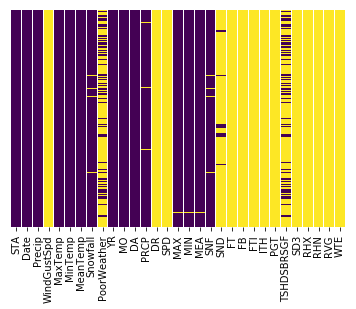

In [9]:
sns.heatmap(train_summary_weather.isnull(),yticklabels = False,cbar= False, cmap='viridis')

In [29]:
print('WindGustSpd: ' + str(len(train_summary_weather[train_summary_weather['WindGustSpd'].notna()])))
print('DR: ' + str(len(train_summary_weather[train_summary_weather['DR'].notna()])))
print('SPD: ' + str(len(train_summary_weather[train_summary_weather['SPD'].notna()])))
print('FT: ' + str(len(train_summary_weather[train_summary_weather['FT'].notna()])))
print('FB: ' + str(len(train_summary_weather[train_summary_weather['FB'].notna()])))
print('FTI: ' + str(len(train_summary_weather[train_summary_weather['FTI'].notna()])))
print('ITH: ' + str(len(train_summary_weather[train_summary_weather['ITH'].notna()])))
print('PGT: ' + str(len(train_summary_weather[train_summary_weather['PGT'].notna()])))
print('SD3: ' + str(len(train_summary_weather[train_summary_weather['SD3'].notna()])))
print('RHX: ' + str(len(train_summary_weather[train_summary_weather['RHX'].notna()])))
print('RHN: ' + str(len(train_summary_weather[train_summary_weather['RHN'].notna()])))
print('RVG: ' + str(len(train_summary_weather[train_summary_weather['RVG'].notna()])))
print('WTE: ' + str(len(train_summary_weather[train_summary_weather['WTE'].notna()])))

#train_summary_weather['WindGustSpd']

WindGustSpd: 532
DR: 533
SPD: 532
FT: 0
FB: 0
FTI: 0
ITH: 0
PGT: 525
SD3: 0
RHX: 0
RHN: 0
RVG: 0
WTE: 0


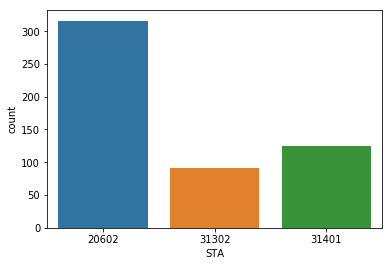

In [11]:
sns.countplot(train_summary_weather[train_summary_weather['WindGustSpd'].notna()]['STA'])

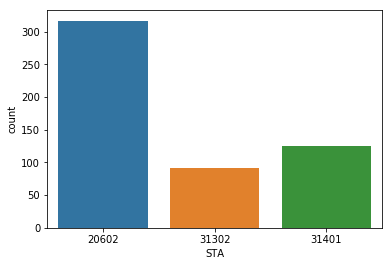

In [12]:
sns.countplot(train_summary_weather[train_summary_weather['DR'].notna()]['STA'])

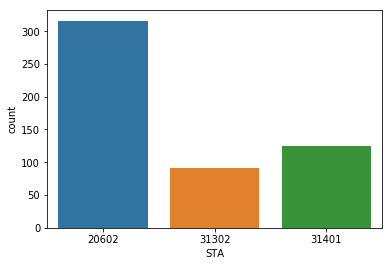

In [13]:
sns.countplot(train_summary_weather[train_summary_weather['SPD'].notna()]['STA'])

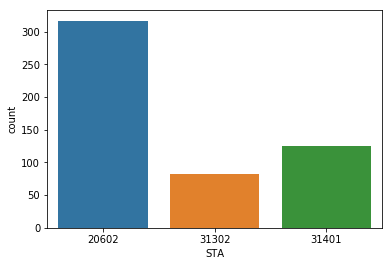

In [14]:
sns.countplot(train_summary_weather[train_summary_weather['PGT'].notna()]['STA'])

In [15]:
train_summary_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
STA            119040 non-null int64
Date           119040 non-null object
Precip         119040 non-null object
WindGustSpd    532 non-null float64
MaxTemp        119040 non-null float64
MinTemp        119040 non-null float64
MeanTemp       119040 non-null float64
Snowfall       117877 non-null object
PoorWeather    34237 non-null object
YR             119040 non-null int64
MO             119040 non-null int64
DA             119040 non-null int64
PRCP           117108 non-null object
DR             533 non-null float64
SPD            532 non-null float64
MAX            118566 non-null float64
MIN            118572 non-null float64
MEA            118542 non-null float64
SNF            117877 non-null object
SND            5563 non-null float64
FT             0 non-null float64
FB             0 non-null float64
FTI            0 non-null float64
ITH            0 non-null float64

In [17]:
train_summary_weather.describe()

STA  WindGustSpd        MaxTemp        MinTemp  \
count  119040.000000   532.000000  119040.000000  119040.000000   
mean    29659.435795    37.774534      27.045111      17.789511   
std     20953.209402    10.297808       8.717817       8.334572   
min     10001.000000    18.520000     -33.333333     -38.333333   
25%     11801.000000    29.632000      25.555556      15.000000   
50%     22508.000000    37.040000      29.444444      21.111111   
75%     33501.000000    43.059000      31.666667      23.333333   
max     82506.000000    75.932000      50.000000      34.444444   

            MeanTemp             YR             MO             DA          DR  \
count  119040.000000  119040.000000  119040.000000  119040.000000  533.000000   
mean       22.411631      43.805284       6.726016      15.797530   26.998124   
std         8.297982       1.136718       3.425561       8.794541   15.221732   
min       -35.555556      40.000000       1.000000       1.000000    2.000000   
25%        20.555556      43.000000       4.000000       8.000000   11.000000   
50%        25.555556      44.000000       7.000000      16.000000   32.000000   
75%        27.222222      45.000000      10.000000      23.000000   34.000000   
max        40.000000      45.000000      12.000000      31.000000   78.000000   

              SPD ...    FT   FB  FTI  ITH         PGT  SD3  RHX  RHN  RVG  \
count  532.000000 ...   0.0  0.0  0.0  0.0  525.000000  0.0  0.0  0.0  0.0   
mean    20.396617 ...   NaN  NaN  NaN  NaN   12.085333  NaN  NaN  NaN  NaN   
std      5.560371 ...   NaN  NaN  NaN  NaN    5.731328  NaN  NaN  NaN  NaN   
min     10.000000 ...   NaN  NaN  NaN  NaN    0.000000  NaN  NaN  NaN  NaN   
25%     16.000000 ...   NaN  NaN  NaN  NaN    8.500000  NaN  NaN  NaN  NaN   
50%     20.000000 ...   NaN  NaN  NaN  NaN   11.600000  NaN  NaN  NaN  NaN   
75%     23.250000 ...   NaN  NaN  NaN  NaN   15.000000  NaN  NaN  NaN  NaN   
max     41.000000 ...   NaN  NaN  NaN  NaN   23.900000  NaN  NaN  NaN  NaN   

       WTE  
count  0.0  
mean   NaN  
std    NaN  
min    NaN  
25%    NaN  
50%    NaN  
75%    NaN  
max    NaN  

[8 rows x 24 columns]

In [206]:
#Algumas conclusões dos plots anteriores: 
#1) Analisando o datasheet, é possível verificar que as colunas FT, FB, FTI, ITH, SD3, RHX, RHN, RVG, WTE não possuem qualquer valor.
#2) Faz sentido então dropar as colunas "FT, FB, FTI, ITH, SD3, RHX, RHN, RVG, WTE".
#3) As colunas WindGustSpd, DR, SPD e PGT possuem a maior parte de seus valores como NaN, com apenas alguns sendo de fato dados provenientes apenas de 3 STAs diferentes (20602,31302,31401) 
#4) E com base no heatmap, há colunas com muito mais valores nulos do que informações, essas colunas serão retiradas 
#e inseridas caso sejam necessárias uma análise mais precisa dos dados, são elas:
# WindGustSpd, PoorWeather, DR, SPD, SND, PGT, TSHDSBRSGF
train_summary_weather_dropped = train_summary_weather.copy()
train_summary_weather_dropped.drop(['WindGustSpd', 'PoorWeather', 'DR', 'SPD', 'SND', 'PGT', 'TSHDSBRSGF', 'FT', 'FB', 'FTI', 'ITH', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],axis=1,inplace = True) 

In [207]:
train_summary_weather_dropped.head()

STA      Date Precip    MaxTemp    MinTemp   MeanTemp Snowfall  YR  MO  \
0  10001  1942-7-1  1.016  25.555556  22.222222  23.888889        0  42   7   
1  10001  1942-7-2      0  28.888889  21.666667  25.555556        0  42   7   
2  10001  1942-7-3   2.54  26.111111  22.222222  24.444444        0  42   7   
3  10001  1942-7-4   2.54  26.666667  22.222222  24.444444        0  42   7   
4  10001  1942-7-5      0  26.666667  21.666667  24.444444        0  42   7   

   DA  PRCP   MAX   MIN   MEA SNF  
0   1  0.04  78.0  72.0  75.0   0  
1   2     0  84.0  71.0  78.0   0  
2   3   0.1  79.0  72.0  76.0   0  
3   4   0.1  80.0  72.0  76.0   0  
4   5     0  80.0  71.0  76.0   0

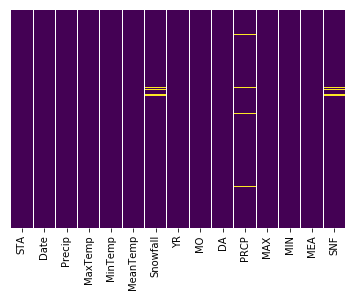

In [208]:
sns.heatmap(train_summary_weather_dropped.isnull(),yticklabels = False,cbar= False, cmap='viridis')

1163
119040


/home/daniel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/daniel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


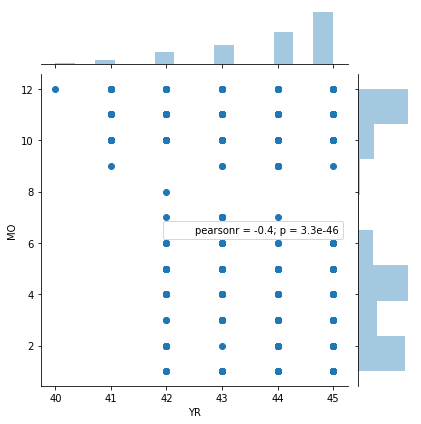

In [209]:
#Analisando os NaN de "Snowfall"
#train_summary_weather_dropped[train_summary_weather_dropped['Snowfall']==10001]
print(len(train_summary_weather_dropped[train_summary_weather_dropped.isnull().Snowfall]))
print(len(train_summary_weather_dropped.Snowfall))
#train_summary_weather_dropped[train_summary_weather_dropped.isnull().Snowfall]
#sns.countplot(train_summary_weather_dropped[train_summary_weather_dropped.isnull().Snowfall]['YR'])
sns.jointplot(train_summary_weather_dropped[train_summary_weather_dropped.isnull().Snowfall]['YR'],train_summary_weather_dropped[train_summary_weather_dropped.isnull().Snowfall]['MO'],kind='scatter')

1932
119040


/home/daniel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/daniel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


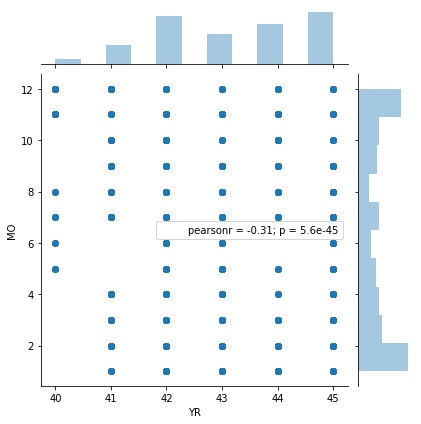

In [210]:
#Analisando os NaN de "PRCP"
#train_summary_weather_dropped[train_summary_weather_dropped['Snowfall']==10001]
print(len(train_summary_weather_dropped[train_summary_weather_dropped.isnull().PRCP]))
print(len(train_summary_weather_dropped.PRCP))
#train_summary_weather_dropped[train_summary_weather_dropped.isnull().Snowfall]
#sns.countplot(train_summary_weather_dropped[train_summary_weather_dropped.isnull().PRCP]['YR'])
#sns.countplot(train_summary_weather_dropped[train_summary_weather_dropped.isnull().PRCP]['MO'])
sns.jointplot(train_summary_weather_dropped[train_summary_weather_dropped.isnull().PRCP]['YR'],train_summary_weather_dropped[train_summary_weather_dropped.isnull().PRCP]['MO'],kind='scatter')

1163
119040


/home/daniel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/daniel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


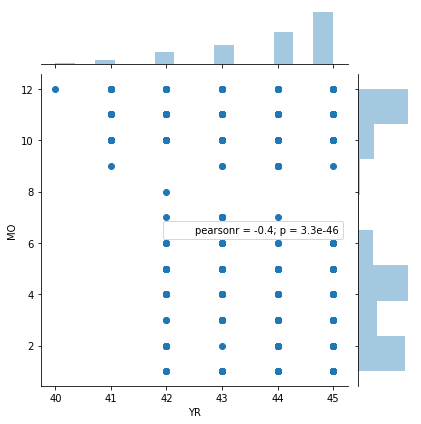

In [211]:
#Analisando os NaN de "SNF"
#train_summary_weather_dropped[train_summary_weather_dropped['Snowfall']==10001]
print(len(train_summary_weather_dropped[train_summary_weather_dropped.isnull().SNF]))
print(len(train_summary_weather_dropped.SNF))
#train_summary_weather_dropped[train_summary_weather_dropped.isnull().Snowfall]
#sns.countplot(train_summary_weather_dropped[train_summary_weather_dropped.isnull().PRCP]['YR'])
#sns.countplot(train_summary_weather_dropped[train_summary_weather_dropped.isnull().PRCP]['MO'])
sns.jointplot(train_summary_weather_dropped[train_summary_weather_dropped.isnull().SNF]['YR'],train_summary_weather_dropped[train_summary_weather_dropped.isnull().SNF]['MO'],kind='scatter')

In [212]:
#Conlusões sobre a análise dos dados nulos nos campos SnowFall, PRCP, SNF: 
#1) Todos os dados NaN são referentes aos anos entre 1940 e 1945
#2) Estratégia de completar os "missing" values: Média dos meses de outros anos.

def impute_snowfall(cols):
    snowfall = cols[0]
    mo = cols[1]
    if pd.isnull(snowfall):
        return train_summary_weather_dropped[train_summary_weather_dropped['MO'] == mo]['Snowfall'].notna().mean()
    else:
        return snowfall
    
def impute_PRCP(cols):
    prcp = cols[0]
    mo = cols[1]
    if pd.isnull(prcp):
        return train_summary_weather_dropped[train_summary_weather_dropped['MO'] == mo]['PRCP'].notna().mean()
    else:
        return prcp
    
def impute_SNF(cols):
    snf = cols[0]
    mo = cols[1]
    if pd.isnull(snf):
        return train_summary_weather_dropped[train_summary_weather_dropped['MO'] == mo]['SNF'].notna().mean()
    else:
        return snf
    
        
train_summary_weather_dropped['Snowfall'] = train_summary_weather_dropped[['Snowfall','MO']].apply(impute_snowfall,axis=1)
train_summary_weather_dropped['PRCP'] = train_summary_weather_dropped[['PRCP','MO']].apply(impute_snowfall,axis=1)
train_summary_weather_dropped['SNF'] = train_summary_weather_dropped[['SNF','MO']].apply(impute_snowfall,axis=1)


#snowfall_per_month=[0]*13
#for i in range(0,13):
#    snowfall_per_month[i]=train_summary_weather_dropped[train_summary_weather_dropped['MO'] == i+1]['Snowfall'].notna().mean()
#print(snowfall_per_month)


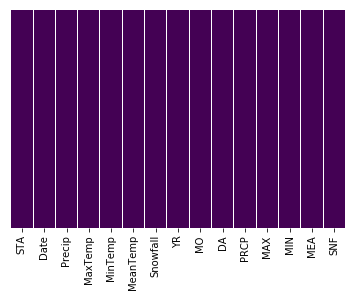

In [213]:
sns.heatmap(train_summary_weather_dropped.isnull(),yticklabels = False,cbar= False, cmap='viridis')

STA           0
Date          0
Precip        0
MaxTemp       0
MinTemp       0
MeanTemp      0
Snowfall      0
YR            0
MO            0
DA            0
PRCP          0
MAX         474
MIN         468
MEA         498
SNF           0
dtype: int64


/home/daniel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/daniel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


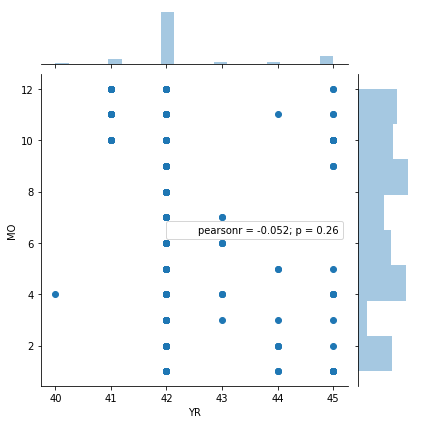

In [214]:
#Análise dos dados do heatmap foi feita, agora verificar se há ainda valores NaN
print(train_summary_weather_dropped.isnull().sum())

sns.jointplot(train_summary_weather_dropped[train_summary_weather_dropped.isnull().MAX]['YR'],train_summary_weather_dropped[train_summary_weather_dropped.isnull().MAX]['MO'],kind='scatter')


/home/daniel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/daniel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


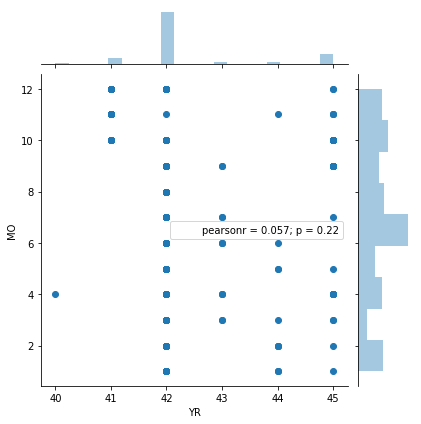

In [215]:
sns.jointplot(train_summary_weather_dropped[train_summary_weather_dropped.isnull().MIN]['YR'],train_summary_weather_dropped[train_summary_weather_dropped.isnull().MIN]['MO'],kind='scatter')


/home/daniel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/daniel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


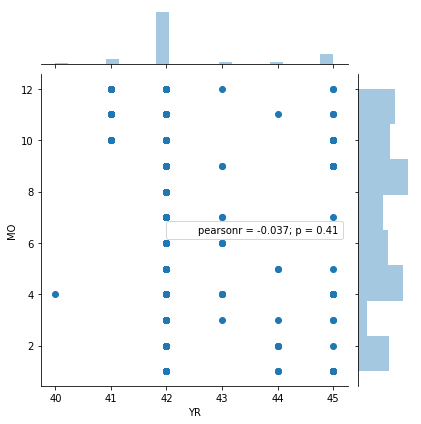

In [216]:
sns.jointplot(train_summary_weather_dropped[train_summary_weather_dropped.isnull().MEA]['YR'],train_summary_weather_dropped[train_summary_weather_dropped.isnull().MEA]['MO'],kind='scatter')


In [217]:
#Conlusões sobre a análise dos dados nulos nos campos MAX, MIN, MEA: 
#1) Todos os dados NaN são referentes aos anos entre 1940 e 1945.
#2) Estratégia de completar os "missing" values: Média dos meses de outros anos.

def impute_max(cols):
    impute_max_values = cols[0]
    mo = cols[1]
    if pd.isnull(impute_max_values):
        return train_summary_weather_dropped[train_summary_weather_dropped['MO'] == mo]['MAX'].notna().mean()
    else:
        return impute_max_values

def impute_min(cols):
    impute_min_values = cols[0]
    mo = cols[1]
    if pd.isnull(impute_min_values):
        return train_summary_weather_dropped[train_summary_weather_dropped['MO'] == mo]['MIN'].notna().mean()
    else:
        return impute_min_values

def impute_mea(cols):
    impute_mea_values = cols[0]
    mo = cols[1]
    if pd.isnull(impute_mea_values):
        return train_summary_weather_dropped[train_summary_weather_dropped['MO'] == mo]['MEA'].notna().mean()
    else:
        return impute_mea_values
    

train_summary_weather_dropped['MAX'] = train_summary_weather_dropped[['MAX','MO']].apply(impute_max,axis=1)
train_summary_weather_dropped['MIN'] = train_summary_weather_dropped[['MIN','MO']].apply(impute_min,axis=1)
train_summary_weather_dropped['MEA'] = train_summary_weather_dropped[['MEA','MO']].apply(impute_mea,axis=1)


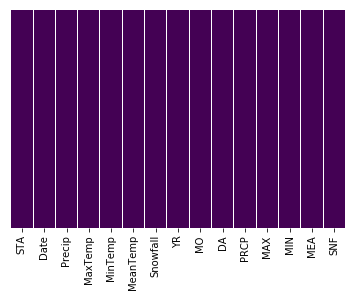

In [218]:
sns.heatmap(train_summary_weather_dropped.isnull(),yticklabels = False,cbar= False, cmap='viridis')

In [340]:
#train_summary_weather_dropped[train_summary_weather_dropped['Precip']=='T']
#sns.countplot(train_summary_weather_dropped[train_summary_weather_dropped['Precip']=='T']['MeanTemp'])
#Foi necessário pois há valores 'T' em campos apenas numericos sem significado aparente, nesse caso em específico,
# o campo que tinha as valores 'T' era o de precipitações. As colunas 'Precip' e 'PRCP' são todas str

def impute_0(cols):
    impute_mea_values = cols
    if impute_mea_values == 'T':
        return 0
    elif impute_mea_values == '#VALUE!':
        return 0
    elif type(impute_mea_values) == str:
        return float(impute_mea_values)
    else:
        return impute_mea_values

train_summary_weather_dropped_teste = train_summary_weather_dropped.copy()    
train_summary_weather_dropped_teste['Precip'] = train_summary_weather_dropped_teste['Precip'].apply(impute_0)
train_summary_weather_dropped_teste['PRCP'] = train_summary_weather_dropped_teste['PRCP'].apply(impute_0)
train_summary_weather_dropped_teste['MaxTemp'] = train_summary_weather_dropped_teste['MaxTemp'].apply(impute_0)
train_summary_weather_dropped_teste['MinTemp'] = train_summary_weather_dropped_teste['MinTemp'].apply(impute_0)
train_summary_weather_dropped_teste['MeanTemp'] = train_summary_weather_dropped_teste['MeanTemp'].apply(impute_0)
train_summary_weather_dropped_teste['Snowfall'] = train_summary_weather_dropped_teste['Snowfall'].apply(impute_0)
train_summary_weather_dropped_teste['YR'] = train_summary_weather_dropped_teste['YR'].apply(impute_0)
train_summary_weather_dropped_teste['MO'] = train_summary_weather_dropped_teste['MO'].apply(impute_0)
train_summary_weather_dropped_teste['DA'] = train_summary_weather_dropped_teste['DA'].apply(impute_0)

#train_summary_weather_dropped_teste[train_summary_weather_dropped_teste['Snowfall'] == '#VALUE!']

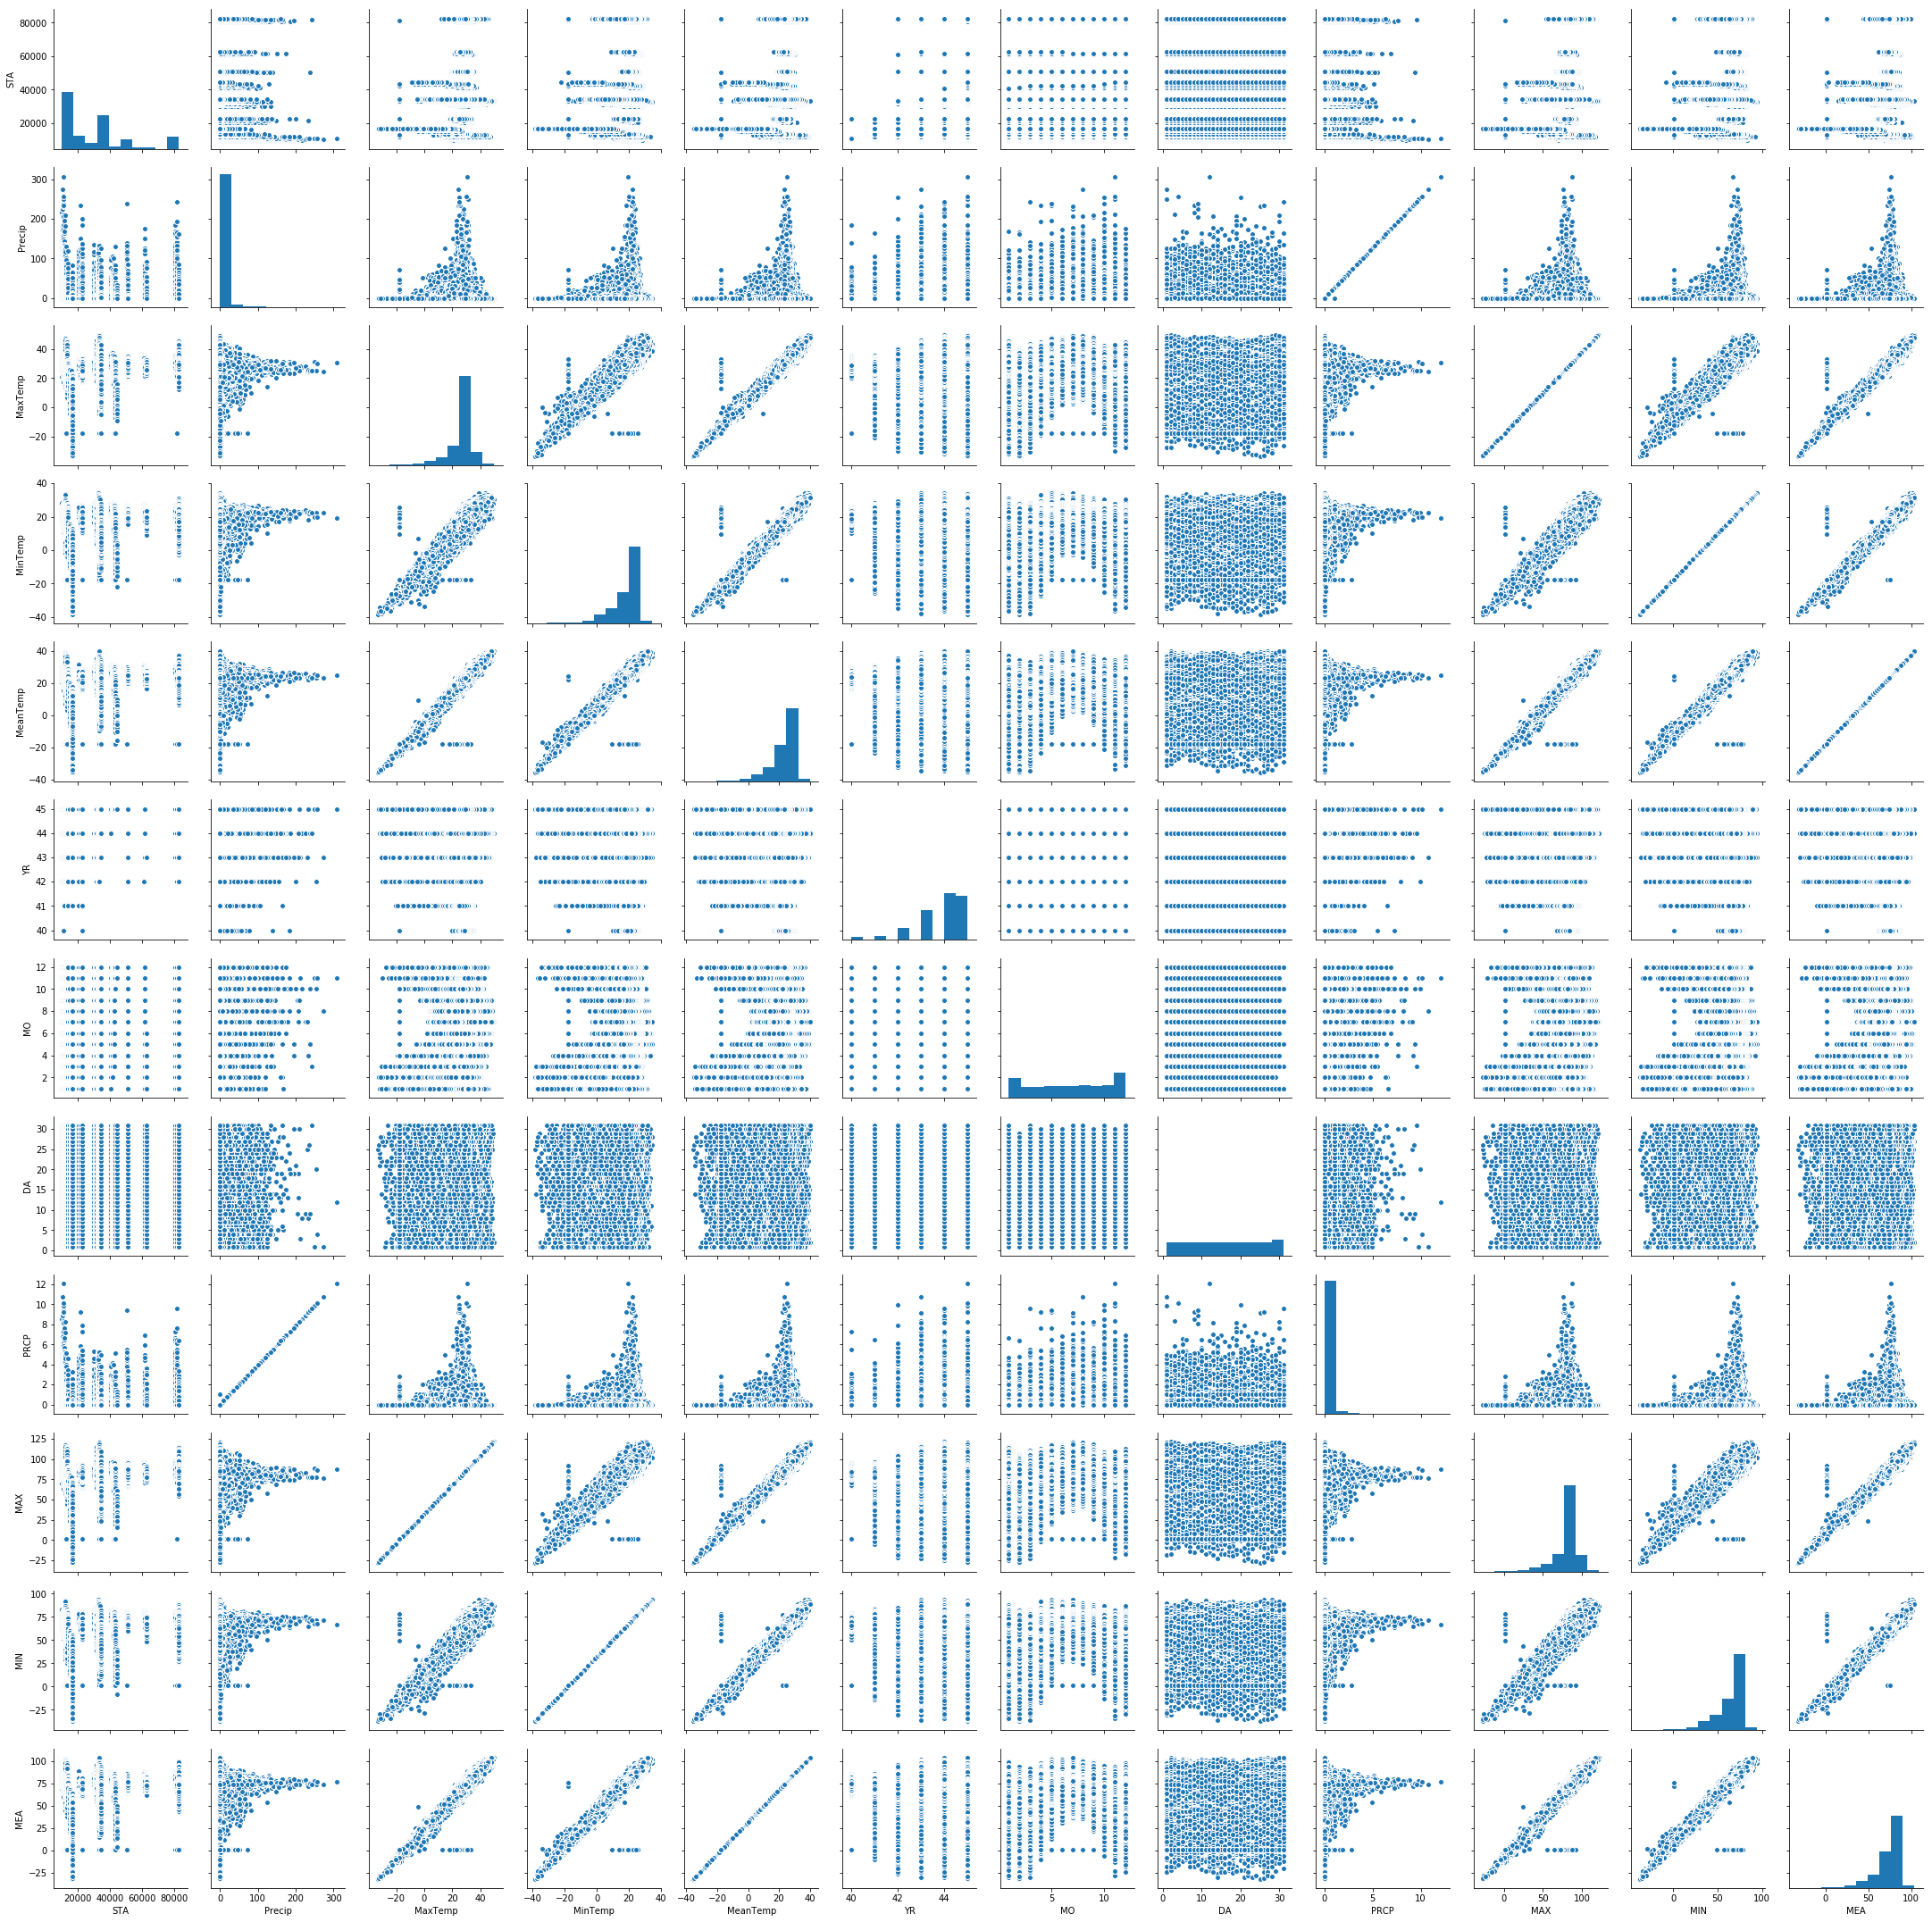

In [290]:
#sns.heatmap(train_summary_weather_dropped_teste.isnull(),yticklabels = False,cbar= False, cmap='viridis')
sns.pairplot(train_summary_weather_dropped_teste)
#print(train_summary_weather_dropped_teste.isna().sum())

#train_summary_weather_dropped[train_summary_weather_dropped_teste.isna().PRCP]
#train_summary_weather_dropped['PRCP'][900]

#train_summary_weather_dropped_teste.applymap(np.isreal).Precip
#type(train_summary_weather_dropped_teste['Precip'][0])
#train_summary_weather_dropped_teste.head()

TRAINING AND TEST DATA

In [341]:
#verificando os index
train_summary_weather_dropped_teste.columns

Index(['STA', 'Date', 'Precip', 'MaxTemp', 'MinTemp', 'MeanTemp', 'Snowfall',
       'YR', 'MO', 'DA', 'PRCP', 'MAX', 'MIN', 'MEA', 'SNF'],
      dtype='object')

In [342]:
X = train_summary_weather_dropped_teste[['Precip', 'MinTemp', 'MeanTemp', 'Snowfall','YR', 'MO', 'DA']]
Y = train_summary_weather_dropped_teste['MaxTemp']

In [343]:
#importando o scickitlearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

TRAINING MODEL

In [344]:
from sklearn.linear_model import LinearRegression

In [345]:
lm = LinearRegression()

In [346]:
#sns.heatmap(x_train.isna(),yticklabels = False,cbar= False, cmap='viridis')
#y_train.head()
lm.fit(x_train,y_train)
#type(train_summary_weather_dropped_teste['DA'][1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [347]:
lm.coef_

array([-3.74726090e-03, -8.90595571e-01,  1.88129628e+00, -1.59963063e-02,
        2.15708390e-02, -8.63658914e-04,  3.79632331e-04])

Predicting Test Data

In [348]:
predicted_x=lm.predict(x_test)

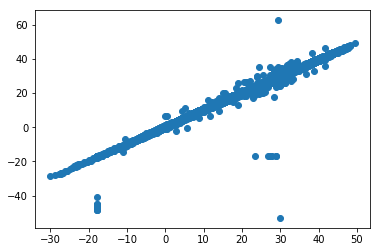

In [349]:
plt.scatter(y_test,predicted_x)

Evaluating Model

In [351]:
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(predicted_x,y_test))
print('MSE: ', metrics.mean_squared_error(predicted_x,y_test))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(predicted_x,y_test)))

MAE:  0.39008778768453933
MSE:  1.1356470246103887
RMSE:  1.0656674080642556


/home/daniel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


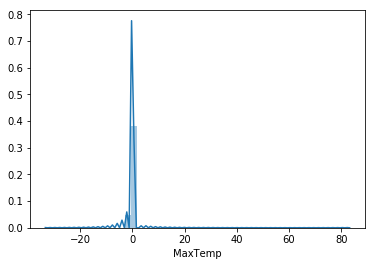

In [353]:
sns.distplot(y_test-predicted_x,bins=50)

In [354]:
#Conclusion
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
#customers.columns
#columns['Coefficient']
coeff_df

Coeff
Precip   -0.003747
MinTemp  -0.890596
MeanTemp  1.881296
Snowfall -0.015996
YR        0.021571
MO       -0.000864
DA        0.000380